<a href="https://colab.research.google.com/github/liehanels/PDAN/blob/main/PDAN_FirstLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
!pip install -q findspark kaggle

^C


In [ ]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, count, desc, split, explode
import matplotlib.pyplot as plt
import findspark

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
findspark.init()
spark = SparkSession.builder.appName("Amazon-Spark-Analysis").getOrCreate()
spark

In [ ]:
file_path = '/content/train.ft.txt' # Assuming it is in the default content directory

try:
    with open(file_path, 'r') as f:
        # Read the entire file content
        file_content = f.read()
        # Or read line by line
        # file_content = f.readlines()

    print(file_content[:100]) # Print the first 100 characters as an example

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in y


In [ ]:
df = spark.read.text("train.ft.txt")
df.printSchema()
df.show()

root
 |-- value: string (nullable = true)

+--------------------+
|               value|
+--------------------+
|__label__2 Stunin...|
|__label__2 The be...|
|__label__2 Amazin...|
|__label__2 Excell...|
|__label__2 Rememb...|
|__label__2 an abs...|
|__label__1 Buyer ...|
|__label__2 Glorio...|
|__label__2 A FIVE...|
|__label__2 Whispe...|
|__label__1 The Wo...|
|__label__2 Great ...|
|__label__2 Great ...|
|__label__1 Oh ple...|
|__label__1 Awful ...|
|__label__1 Don't ...|
|__label__2 A roma...|
|__label__2 Fashio...|
|__label__2 Jobst ...|
|__label__1 sizes ...|
+--------------------+
only showing top 20 rows



Number of rows: 3609346
First row: Row(value='__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^', label='__label__2', text='Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^', text_length=426)
+-----------------------------------------

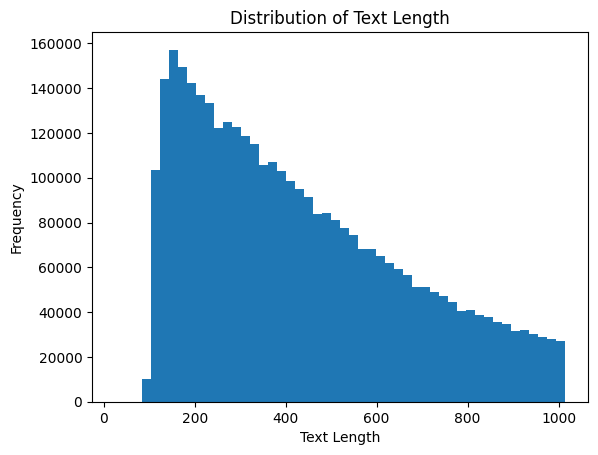

+-------+-----------------+
|summary|       word_count|
+-------+-----------------+
|  count|          3609346|
|   mean|78.48543614272502|
| stddev|42.83370544409233|
|    min|                2|
|    max|              257|
+-------+-----------------+

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# prompt: now I need to perform basic EDA on this data set

# Show the number of rows
print("Number of rows:", df.count())
# Get the first row to inspect the data format
first_row = df.first()
print("First row:", first_row)
# Assuming the data is in the format __label__X Some text
# Let's try to extract the label and the text
df = df.withColumn("label", split(col("value"), " ").getItem(0))
df = df.withColumn("text", split(col("value"), " ", 2).getItem(1))
df.show(5, truncate=False)
# Check the distribution of labels
label_counts = df.groupBy("label").count()
label_counts.show()
# Show basic statistics about text length
from pyspark.sql.functions import length
df = df.withColumn("text_length", length(col("text")))
df.describe("text_length").show()
# Plot the distribution of text length (might be slow for large datasets)
collected_lengths = df.select("text_length").collect()
lengths = [row['text_length'] for row in collected_lengths]
plt.hist(lengths, bins=50)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()
# Example of extracting word count (might be slow for large datasets)
from pyspark.sql.functions import size
df = df.withColumn("word_count", size(split(col("text"), " ")))
df.describe("word_count").show()
df.show(5, truncate=False)